# Create publication plots

#### Configure matplotlib for final figure styles

In [1]:
%matplotlib inline
# Configure matplotlib
from s90_helper_functions import *
configure_matplotlib()

# Other imports
import matplotlib.pyplot as plt
import numpy as np

#### 3D wavelet

In [2]:
# Compute the wavelets
N=1024;                                             # #of points used for wavelet 
b=0;                                                # Source location along x-axis        
rhorange=2;                                         # Range of rho values (from - to +)
C=1;                                                # Overall normalization constant
lin=np.linspace(1,2*N+1,2*N+1);                     # Creates an array (linear increase without offset)
x=lin-N-1 ;                                         # Symmetric x-vector
d=N/rhorange;                                       # Source distance to array
rho=(x-b)/d;                                        # Normalization of x with respect to distance
x_plot=np.linspace(-rhorange, rhorange, len(x));    # X-axis values for the plot

# wavelet values
denom=(1+rho**2)**(5/2);                            # Denominator of the wavelets
psi_e=(2*rho**2-1)/denom;                           # Even wavelet
psi_o=-(3*rho)/denom;                                # Odd wavelet
psi_n=(2-rho**2)/denom;                             # Navelet
# envenope values
env_vx=np.sqrt(psi_e**2+psi_o**2);                  # Envelope of vx
env_vy=np.sqrt(psi_o**2+psi_n**2) / 2;              # Envelope of vy
# easy 3d plotting value
zero = np.zeros(x.shape);

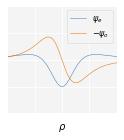

/home/jelmer/miniconda3/envs/basic_jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


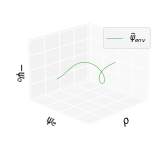

In [3]:
# Figures
width, height = figure_dimensions(0.32)
fig = plt.figure(figsize=(width, width))
plt.plot(x_plot, psi_e, linewidth=0.5)
plt.plot(x_plot, psi_o, linewidth=0.5)
ax = plt.gca()
ax.set_xlim([-rhorange, rhorange])
ax.set_ylim([-rhorange, rhorange])
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'')
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(axis='both', length=0)
plt.legend([r'$\psi_e$', r'$-\psi_o$'])
fig.savefig('images/publication/wavelet_2D')
plt.show()

width, height = figure_dimensions(0.32)
my_palette = create_my_palette()
fig = plt.figure(figsize=(width, width))
ax = fig.gca(projection='3d')
ax.view_init(elev=-160, azim=135)
bounds = [-2, 2]
ax.auto_scale_xyz(bounds, bounds, bounds)
ax.tick_params(length=0, width=0, color=(0, 0, 0, 0))
plt.plot(x_plot, psi_e, psi_o, color=my_palette[2], linewidth=0.5)
ax.set_xlim([-rhorange, rhorange])
ax.set_ylim([-rhorange, rhorange])
ax.set_zlim([-rhorange, rhorange])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_xlabel(r'$\rho$', labelpad=-14)
ax.set_ylabel(r'$\psi_e$', labelpad=-14)
ax.set_zlabel(r'$-\psi_o$', labelpad=-16)
ax.patch.set_facecolor((0, 0, 0, 0))
ax.set_position([0.06, 0, 0.94, 1])
plt.legend([r'$\vec{\psi}_{env}$'],\
           bbox_to_anchor=(1,0.85),\
           bbox_transform=plt.gcf().transFigure)
fig.savefig('images/publication/wavelet_3D')
plt.show()


In [4]:
# Compute velocities
np.cosd = lambda x: np.cos(np.deg2rad(x))
np.sind = lambda x: np.sin(np.deg2rad(x))

phis = np.c_[0, 80, 160, 240, 320].T
light = [0.8, 1, 1.2, 1.4, 1.6, 1.8]
label = ['$0^\circ$', '$80^\circ$', '$160^\circ$', '$240^\circ$', '$320^\circ$']
pos_x = [(1.05, 0.1), (-.65, 0.6), (-.12, 0.75), (0.4, 0.7), (0.8, 0.38)]
pos_y = [(-0.45, 0.3), (-0.05, 0.85), (0.35, 0.45), (-.15, -0.75), (.3, -0.6)]
vx = np.cosd(phis) * psi_e + np.sind(phis) * psi_o;
vy = (np.cosd(phis) * psi_o + np.sind(phis) * psi_n) / 2;

array([320])

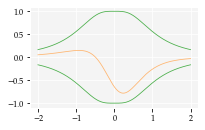

In [5]:
idx = 4
width, height = figure_dimensions(0.49)
my_palette = create_my_palette()
fig = plt.figure(figsize=(width, height))
plt.plot(x_plot, vy[idx], color=adjust_lightness(my_palette[1], light[idx]), linewidth=0.8)
plt.plot(x_plot, env_vx, color=my_palette[2], linewidth=0.8)
plt.plot(x_plot, -env_vx, color=my_palette[2], linewidth=0.8)
phis[idx]

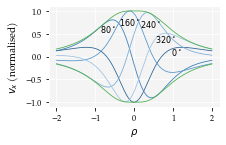

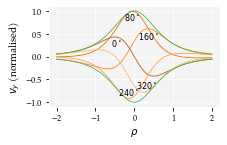

In [6]:
annotate = lambda x, pt : plt.annotate(x, 
                                       xy=pt,
                                       xycoords='data',
                                       xytext=pt,
                                       textcoords='offset points',
                                       ha="center", va="center",
                                       fontsize=mpl.rcParams['xtick.labelsize']) 

width, height = figure_dimensions(0.49)
my_palette = create_my_palette()
fig = plt.figure(figsize=(width, height))
for idx in range(len(phis)):
    plt.plot(x_plot, vx[idx], color=adjust_lightness(my_palette[0], light[idx]), linewidth=0.8)
    annotate(label[idx], pos_x[idx])
plt.plot(x_plot, env_vx, color=my_palette[2], linewidth=0.8)
plt.plot(x_plot, -env_vx, color=my_palette[2], linewidth=0.8)
# labels
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.ylabel(r'$v_x$ (normalised)')
plt.xlabel(r'$\rho$')
# l = plt.legend([r'$\psi_{x,env}$', r'$\varphi=$~\SI{0}{\degree}', r'$\varphi=$~\SI{80}{\degree}',
#                 r'$\varphi=$~\SI{160}{\degree}', r'$\varphi=$~\SI{240}{\degree}', r'$\varphi=$~\SI{320}{\degree}'], loc='lower left')
fig.subplots_adjust(left=0.2, right=0.99, top=0.95, bottom=0.2)
fig.savefig('images/publication/envelope_x')
plt.show()

width, height = figure_dimensions(0.49)
my_palette = create_my_palette()
fig = plt.figure(figsize=(width, height))
for idx in range(len(phis)):
    plt.plot(x_plot, vy[idx], color=adjust_lightness(my_palette[1], light[idx]), linewidth=0.8)
    annotate(label[idx], pos_y[idx])
plt.plot(x_plot, env_vy, color=my_palette[2], linewidth=0.8)
plt.plot(x_plot, -env_vy, color=my_palette[2], linewidth=0.8)
# labels
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.ylabel(r'$v_y$ (normalised)')
plt.xlabel(r'$\rho$')
# l = plt.legend([r'$\psi_{x,env}$', r'$\varphi=$~\SI{0}{\degree}', r'$\varphi=$~\SI{80}{\degree}',
#                 r'$\varphi=$~\SI{160}{\degree}', r'$\varphi=$~\SI{240}{\degree}', r'$\varphi=$~\SI{320}{\degree}'], loc='lower left')
fig.subplots_adjust(left=0.2, right=0.99, top=0.95, bottom=0.2)
fig.savefig('images/publication/envelope_y')
plt.show()

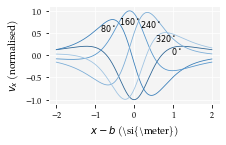

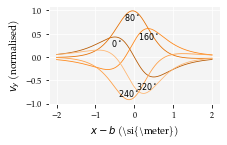

In [7]:
annotate = lambda x, pt : plt.annotate(x, 
                                       xy=pt,
                                       xycoords='data',
                                       xytext=pt,
                                       textcoords='offset points',
                                       ha="center", va="center",
                                       fontsize=mpl.rcParams['xtick.labelsize']) 

width, height = figure_dimensions(0.49)
my_palette = create_my_palette()
fig = plt.figure(figsize=(width, height))
for idx in range(len(phis)):
    plt.plot(x_plot, vx[idx], color=adjust_lightness(my_palette[0], light[idx]), linewidth=0.8)
    annotate(label[idx], pos_x[idx])
# labels
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.ylabel(r'$v_x$ (normalised)')
plt.xlabel(r'$x-b$ (\si{\meter})')
# l = plt.legend([r'$\psi_{x,env}$', r'$\varphi=$~\SI{0}{\degree}', r'$\varphi=$~\SI{80}{\degree}',
#                 r'$\varphi=$~\SI{160}{\degree}', r'$\varphi=$~\SI{240}{\degree}', r'$\varphi=$~\SI{320}{\degree}'], loc='lower left')
fig.subplots_adjust(left=0.2, right=0.99, top=0.95, bottom=0.22)
fig.savefig('images/publication/vx')
plt.show()

width, height = figure_dimensions(0.49)
my_palette = create_my_palette()
fig = plt.figure(figsize=(width, height))
for idx in range(len(phis)):
    plt.plot(x_plot, vy[idx], color=adjust_lightness(my_palette[1], light[idx]), linewidth=0.8)
    annotate(label[idx], pos_y[idx])
# labels
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.ylabel(r'$v_y$ (normalised)')
plt.xlabel(r'$x-b$ (\si{\meter})')
# l = plt.legend([r'$\psi_{x,env}$', r'$\varphi=$~\SI{0}{\degree}', r'$\varphi=$~\SI{80}{\degree}',
#                 r'$\varphi=$~\SI{160}{\degree}', r'$\varphi=$~\SI{240}{\degree}', r'$\varphi=$~\SI{320}{\degree}'], loc='lower left')
fig.subplots_adjust(left=0.2, right=0.99, top=0.95, bottom=0.22)
fig.savefig('images/publication/vy')
plt.show()

In [8]:
a = fig.get_axes()

In [9]:
# Quadrature curve
psi_quad = np.sqrt(vx**2 + 1/2*((vy*2)**2))
psi_quad = psi_quad / psi_quad[:,rho==0]
psi_sym = ((7/4 *rho**4 - 13/4*rho**2 - 1/2) * np.cosd(2*phis) + 9/4*rho**4 + 15/4*rho**2 + 3/2) / ((1+rho**2)**5 * (1 + np.sind(phis)**2))
psi_skew = (9/2*rho**3 * np.sind(2*phis)) / ((1+rho**2)**5 * (1 + np.sind(phis)**2))

rho_anchor = 2 / np.sqrt(5)

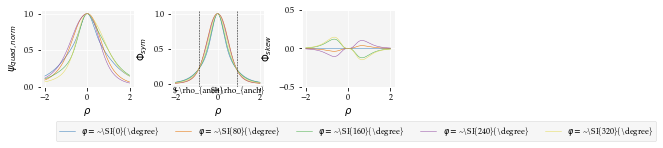

In [10]:
annotate = lambda x, pt : plt.annotate(x, 
                                       xy=pt,
                                       xycoords=plt.gca().get_xaxis_transform(),
                                       xytext=pt,
                                       textcoords='offset points',
                                       ha="center", va="center",
                                       fontsize=mpl.rcParams['xtick.labelsize']) 

width, height = figure_dimensions(0.9, 0.35)
my_palette = create_my_palette()
fig = plt.figure(figsize=(width, height))
plt.subplot(1,3,1)
for idx in range(len(phis)):
    plt.plot(x_plot, psi_quad[idx], color=my_palette[idx], linewidth=0.5)
# labels
plt.yticks([0, 0.5, 1])
plt.ylabel(r'$\psi_{quad,norm}$')
plt.xlabel(r'$\rho$')
l = plt.legend([r'$\varphi=$~\SI{0}{\degree}', r'$\varphi=$~\SI{80}{\degree}',
                r'$\varphi=$~\SI{160}{\degree}', r'$\varphi=$~\SI{240}{\degree}', 
                r'$\varphi=$~\SI{320}{\degree}'], loc='upper left', bbox_to_anchor=(0.12, -0.4), ncol=5)


plt.subplot(1,3,2)
for idx in range(len(phis)):
    plt.plot(x_plot, psi_sym[idx], color=my_palette[idx], linewidth=0.5)
plt.axvline(-rho_anchor, color=[0, 0, 0], linestyle='--', linewidth=0.5)
plt.axvline(rho_anchor, color=[0, 0, 0], linestyle='--', linewidth=0.5)
annotate(r'$+\rho_{anch}', (rho_anchor, -0.05))
annotate(r'$-\rho_{anch}', (-rho_anchor,-0.05))
plt.yticks([0, 0.5, 1])
plt.ylabel(r'$\Phi_{sym}$')
plt.xlabel(r'$\rho$')

plt.subplot(1,3,3)
for idx in range(len(phis)):
    plt.plot(x_plot, psi_skew[idx], color=my_palette[idx], linewidth=0.5)
# labels
plt.yticks([-0.5, 0, 0.5])
plt.ylabel(r'$\Phi_{skew}$')
plt.xlabel(r'$\rho$')
plt.subplots_adjust(wspace=0.4, top=0.95, left=0.1, right=0.99, bottom=0.4)

fig.savefig('images/publication/quad_curve')
plt.show()


1.7765282012195123
0.011233818827353019


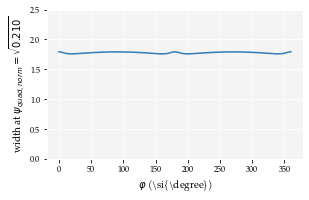

In [11]:
# Check the width of psi_quad for different orienations
N=1024;                                             # #of points used for wavelet 
b=0;                                                # Source location along x-axis        
rhorange=2;                                         # Range of rho values (from - to +)
lin=np.linspace(1,2*N+1,2*N+1);                     # Creates an array (linear increase without offset)
x=lin-N-1 ;                                         # Symmetric x-vector
d=N/rhorange;                                       # Source distance to array
rho=(x-b)/d;                                        # Normalization of x with respect to distance
x_plot=np.linspace(-rhorange, rhorange, len(x));    # X-axis values for the plot

# wavelet values
denom=(1+rho**2)**(5/2);                            # Denominator of the wavelets
psi_e=(2*rho**2-1)/denom;                           # Even wavelet
psi_o=(3*rho)/denom;                                # Odd wavelet
psi_n=(2-rho**2)/denom;                             # Navelet

# velocity values
phis = np.linspace(0, 2*np.pi, 1025)[np.newaxis].T
vx = np.cos(phis) * psi_e + np.sin(phis) * psi_o;
vy = (np.cos(phis) * psi_o + np.sin(phis) * psi_n);
phi_quad = np.sqrt(vx**2 + 1/2 * vy**2)
phi_quad_norm = phi_quad / phi_quad[:,rho==0]

# Intersect with sqrt(0.2096)
row_mins_low = abs(phi_quad_norm[:,rho < 0] - 0.4572).argmin(axis=1)
row_mins_high = abs(phi_quad_norm[:,rho > 0] - 0.4572).argmin(axis=1)
curve_width = rho[rho > 0][row_mins_high] - rho[rho < 0][row_mins_low]

width, height = figure_dimensions(0.7)
fig = plt.figure(figsize=(width, height))
plt.plot(np.rad2deg(phis), curve_width, '-')
plt.ylim([0, 2.5])
plt.xlabel(r'$\varphi$ (\si{\degree})')
plt.ylabel(r'width at $\psi_{quad,norm} = \sqrt{0.210}$')

fig.subplots_adjust(bottom=0.17, right=0.95, top=0.95)
fig.savefig('images/publication/quad_curve_width')

print(curve_width.mean())
print(curve_width.std())